In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv').copy()
test_data = pd.read_csv('test.csv').copy()
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
test_data.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [6]:
def extract_group(s):
    return s.split('_')[1]

def extract_id(s):
    return s.split('_')[0]
# train_data['Group'] = train_data['PassengerId'].apply(extract_group).astype('int64')
# train_data['Id'] = train_data['PassengerId'].apply(extract_id).astype('int64')
# train_data['Group']
# train_data['Id']

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
def OneHot(dataset_name, data_name):
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(sparse = False)
    dataset_name[data_name] = SimpleImputer(strategy='most_frequent').fit_transform(dataset_name[[data_name]])
    data = ohe.fit_transform(dataset_name[[data_name]]).astype('int64')
    dataset_name = pd.concat([dataset_name.drop([data_name], axis = 1), 
                            pd.DataFrame(data, columns = [data_name + '_' + col for col in ohe.categories_[0]])], axis = 1)
    return dataset_name

In [9]:
def Imputer(dataset_name, data_name, strategy_type):
    from sklearn.impute import SimpleImputer
    
    dataset_name[data_name] = SimpleImputer(strategy = strategy_type).fit_transform(dataset_name[[data_name]]).astype('int64')
    
    return dataset_name

In [10]:
def Label(dataset_name, data_name, strategy_type):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.impute import SimpleImputer
    
    dataset_name = Imputer(dataset_name, data_name, strategy_type)
    dataset_name[data_name] = LabelEncoder().fit_transform(dataset_name[[data_name]]).astype('int64')

    return dataset_name

In [11]:
# train_data = OneHot(train_data, 'HomePlanet')
# train_data = OneHot(train_data, 'Destination')
# train_data

In [12]:
# train_data.isna().sum()

In [13]:
# test_data.isna().sum()

In [14]:
# train_data = train_data.drop(['Cabin', 'Name'], axis = 1)

In [15]:
# train_data = Label(train_data, 'CryoSleep', 'most_frequent')
# train_data = Imputer(train_data, 'Age', 'median')
# train_data = Label(train_data, 'VIP', 'most_frequent')
# train_data = Imputer(train_data, 'RoomService', 'median')
# train_data = Imputer(train_data, 'FoodCourt', 'median')
# train_data = Imputer(train_data, 'ShoppingMall', 'median')
# train_data = Imputer(train_data, 'Spa', 'median')
# train_data = Imputer(train_data, 'VRDeck', 'median')
# train_data

In [16]:
test_data_Id = test_data['PassengerId']
test_data_Id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [17]:
def data_change(data):
    data['Group'] = data['PassengerId'].apply(extract_group).astype('int64')
    data['Id'] = data['PassengerId'].apply(extract_id).astype('int64')
    data = data.drop(['Cabin', 'Name', 'PassengerId'], axis = 1)
    data = OneHot(data, 'HomePlanet')
    data = OneHot(data, 'Destination')
    data = Label(data, 'CryoSleep', 'most_frequent')
    data = Imputer(data, 'Age', 'median')
    data = Label(data, 'VIP', 'most_frequent')
    data = Imputer(data, 'RoomService', 'median')
    data = Imputer(data, 'FoodCourt', 'median')
    data = Imputer(data, 'ShoppingMall', 'median')
    data = Imputer(data, 'Spa', 'median')
    data = Imputer(data, 'VRDeck', 'median')
    
    data['VIP + CryoSleep'] = data['VIP'] + data['CryoSleep']
    data['RoomService + Spa + VRDeck'] = data['RoomService'] + data['Spa'] + data['VRDeck']
    data['FoodCourt + ShoppingMall'] = data['FoodCourt'] + data['ShoppingMall']
    data['CryoSleep * Age'] = data['CryoSleep'] * data['Age']
    return data

In [18]:
train_data = data_change(train_data)
test_data = data_change(test_data)
train_data

C:\Users\cym80\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cym80\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cym80\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cym80\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,...,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP + CryoSleep,RoomService + Spa + VRDeck,FoodCourt + ShoppingMall,CryoSleep * Age
0,0,39,0,0,0,0,0,0,False,1,...,0,1,0,0,0,1,0,0,0,0
1,0,24,0,109,9,25,549,44,True,1,...,1,0,0,0,0,1,0,702,34,0
2,0,58,1,43,3576,0,6715,49,False,1,...,0,1,0,0,0,1,1,6807,3576,0
3,0,33,0,0,1283,371,3329,193,False,2,...,0,1,0,0,0,1,0,3522,1654,0
4,0,16,0,303,70,151,565,2,True,1,...,1,0,0,0,0,1,0,870,221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41,1,0,6819,0,1643,74,False,1,...,0,1,0,1,0,0,1,1717,6819,0
8689,1,18,0,0,0,0,0,0,False,1,...,1,0,0,0,1,0,1,0,0,18
8690,0,26,0,0,0,1872,1,0,True,1,...,1,0,0,0,0,1,0,1,1872,0
8691,0,32,0,0,1049,0,353,3235,False,1,...,0,1,0,1,0,0,0,3588,1049,0


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CryoSleep                   8693 non-null   int64
 1   Age                         8693 non-null   int64
 2   VIP                         8693 non-null   int64
 3   RoomService                 8693 non-null   int64
 4   FoodCourt                   8693 non-null   int64
 5   ShoppingMall                8693 non-null   int64
 6   Spa                         8693 non-null   int64
 7   VRDeck                      8693 non-null   int64
 8   Transported                 8693 non-null   bool 
 9   Group                       8693 non-null   int64
 10  Id                          8693 non-null   int64
 11  HomePlanet_Earth            8693 non-null   int64
 12  HomePlanet_Europa           8693 non-null   int64
 13  HomePlanet_Mars             8693 non-null   int64
 14  Destinat

In [20]:
test_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Id,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP + CryoSleep,RoomService + Spa + VRDeck,FoodCourt + ShoppingMall,CryoSleep * Age
0,1,27,0,0,0,0,0,0,1,13,1,0,0,0,0,1,1,0,0,27
1,0,19,0,0,9,0,2823,0,1,18,1,0,0,0,0,1,0,2823,9,0
2,1,31,0,0,0,0,0,0,1,19,0,1,0,1,0,0,1,0,0,31
3,0,38,0,0,6652,0,181,585,1,21,0,1,0,0,0,1,0,766,6652,0
4,0,20,0,10,0,635,0,0,1,23,1,0,0,0,0,1,0,10,635,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34,0,0,0,0,0,0,2,9266,1,0,0,0,0,1,1,0,0,34
4273,0,42,0,0,847,17,10,144,1,9269,1,0,0,0,0,1,0,154,864,0
4274,1,26,0,0,0,0,0,0,1,9271,0,0,1,1,0,0,1,0,0,26
4275,0,26,0,0,2680,0,0,523,1,9273,0,1,0,0,0,1,0,523,2680,0


In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CryoSleep                   4277 non-null   int64
 1   Age                         4277 non-null   int64
 2   VIP                         4277 non-null   int64
 3   RoomService                 4277 non-null   int64
 4   FoodCourt                   4277 non-null   int64
 5   ShoppingMall                4277 non-null   int64
 6   Spa                         4277 non-null   int64
 7   VRDeck                      4277 non-null   int64
 8   Group                       4277 non-null   int64
 9   Id                          4277 non-null   int64
 10  HomePlanet_Earth            4277 non-null   int64
 11  HomePlanet_Europa           4277 non-null   int64
 12  HomePlanet_Mars             4277 non-null   int64
 13  Destination_55 Cancri e     4277 non-null   int64
 14  Destinat

In [22]:
corr_matrix = train_data.corr()

In [23]:
corr_matrix['Transported'].sort_values(ascending = False)

Transported                   1.000000
CryoSleep                     0.460132
VIP + CryoSleep               0.437784
CryoSleep * Age               0.401119
HomePlanet_Europa             0.176916
Destination_55 Cancri e       0.108722
Group                         0.066390
FoodCourt + ShoppingMall      0.046189
FoodCourt                     0.045583
Id                            0.021491
HomePlanet_Mars               0.019544
ShoppingMall                  0.009391
Destination_PSO J318.5-22     0.000092
VIP                          -0.037261
Age                          -0.074233
Destination_TRAPPIST-1e      -0.096319
HomePlanet_Earth             -0.168845
VRDeck                       -0.204874
Spa                          -0.218545
RoomService                  -0.241124
RoomService + Spa + VRDeck   -0.348244
Name: Transported, dtype: float64

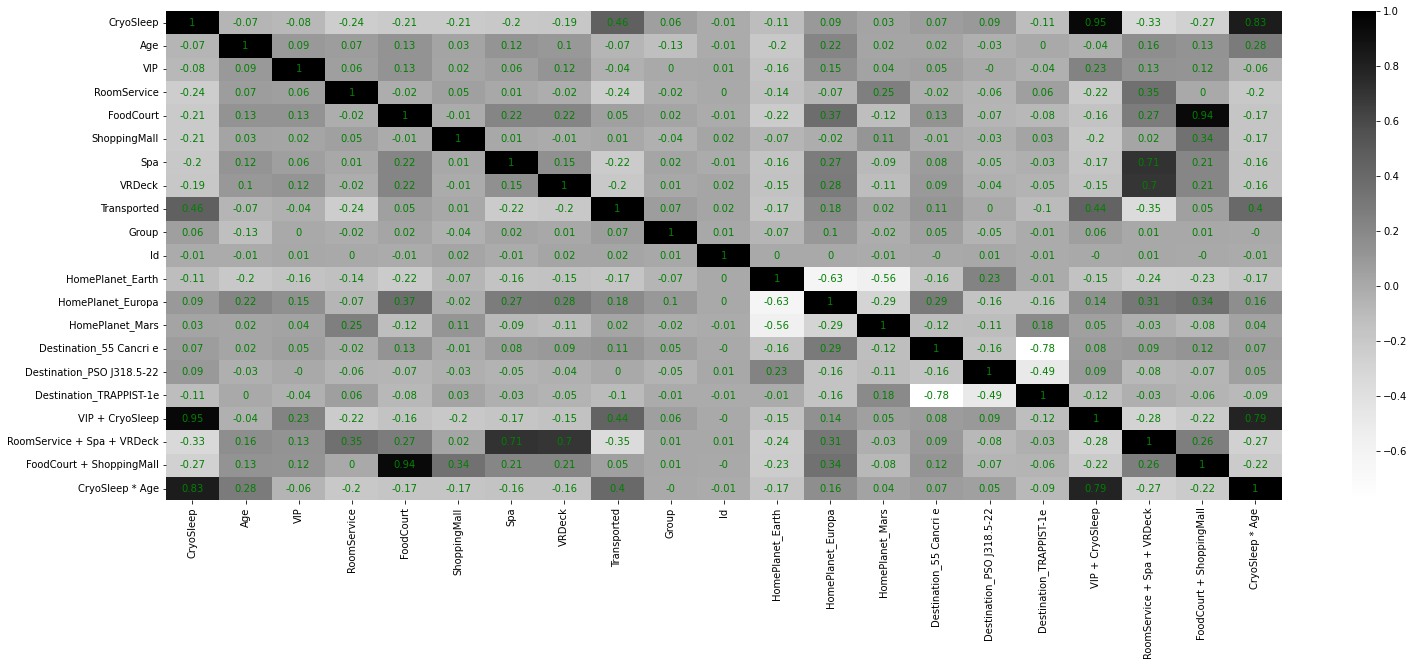

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = train_data.corr()
corr_df = corr_df.apply(lambda x: round(x,2))
corr_df

plt.figure(figsize=(25, 9))
ax = sns.heatmap(corr_df, annot = True, annot_kws = dict(color = 'g'), cmap = 'Greys')
plt.show()

In [25]:
X_train = train_data.drop(['Transported'], axis = 1)
y_train = train_data['Transported']

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
cat = CatBoostClassifier(random_state = 42, verbose = 0)
cat.fit(X_train, y_train)
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)
vot = VotingClassifier(estimators = [('rf', rf), ('cat', cat), ('xgb', xgb)], voting = 'soft')
vot.fit(X_train, y_train)

# RF_param_grid = {
#     'n_estimators' : [40, 50, 60, 70, 80, 90, 100],
#     'max_depth' : [3, 4, 5, 6, 7, 8],
#     'min_samples_split' : [3, 4, 5, 6]
# }

# RF_search = GridSearchCV(RF_clf, param_grid = RF_param_grid, scoring = 'accuracy',
#                         cv = 5, verbose = 1)
# RF_search.fit(X_train, y_train)
# print(RF_search.best_params_)
# RF_clf = RandomForestClassifier(n_estimators=RF_search.best_params_['n_estimators'],
#                                 max_depth = RF_search.best_params_['max_depth'],
#                                 min_samples_split = RF_search.best_params_['min_samples_split'],
#                                 random_state = 42)
# RF_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x0000019129583A00>),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gp..._policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_bin=256, max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=6,
                                            max_leaves=0, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=42,
                                            reg_alpha=0, reg_lambda=1, ...))],
                 voting='soft')

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 50}
RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=50,
                       random_state=42)

In [27]:
cross_val_score(vot, X_train, y_train, cv = 10, scoring = 'accuracy').mean()

0.6813441265558244

In [28]:
predictions = vot.predict(test_data)

In [29]:
predictions

array([ True, False,  True, ...,  True,  True, False])

In [31]:
output = pd.DataFrame({'PassengerId': test_data_Id, 'Transported': predictions})
output.to_csv('vot_rf_cat_xgb.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
